In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [19]:
df = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [20]:
df.shape

(907, 27)

In [21]:
df.head(10)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.7470,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.3700,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
5,IND,India,AKRIMOTA LIG,IND0000003,250.0,23.7689,68.6447,Coal,Oil,NaN,...,2019.0,NaN,1153.421000,1208.8520,1175.765000,1147.913000,976.655000,NaN,Central Electricity Authority,NaN
6,IND,India,ALIYAR,IND0000004,60.0,10.4547,77.0078,Hydro,NaN,NaN,...,2019.0,NaN,157.558250,152.1952,61.421350,89.629600,48.327150,NaN,Central Electricity Authority,NaN
7,IND,India,ALLAIN DUHANGAN,IND0000005,192.0,32.2258,77.2070,Hydro,NaN,NaN,...,2019.0,NaN,674.391100,721.3352,675.724400,679.594950,579.318850,NaN,Central Electricity Authority,NaN
8,IND,India,ALMATTI DAM,IND0000006,290.0,16.3300,75.8863,Hydro,NaN,NaN,...,2019.0,NaN,480.594950,144.4342,402.029750,439.372100,406.377900,NaN,Central Electricity Authority,NaN
9,IND,India,AMAR KANTAK,IND0000007,210.0,23.1642,81.6373,Coal,Oil,NaN,...,2019.0,NaN,1887.904000,1643.0460,1338.093000,1563.457000,1487.880000,NaN,Central Electricity Authority,NaN


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

country,country_long,name,gppd_idnr,latitude,longitude,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2019,estimated_generation_gwh
These are useless column. We need to delete them.

In [23]:
df = df.drop(['country','country_long','name','gppd_idnr','latitude','longitude','other_fuel1','other_fuel2','other_fuel3','commissioning_year','owner','url','geolocation_source','wepp_id','year_of_capacity_data','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'],axis=1)

In [24]:
df

,capacity_mw,primary_fuel,source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,Solar,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,Coal,Ultratech Cement ltd,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,Wind,CDM,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,Gas,Central Electricity Authority,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,1800.0,Coal,Central Electricity Authority,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...
902,1600.0,Coal,Central Electricity Authority,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,3.0,Solar,Karnataka Power Corporation Limited,NaN,NaN,NaN,NaN,NaN,NaN
904,25.5,Wind,CDM,NaN,NaN,NaN,NaN,NaN,NaN
905,80.0,Coal,Hindustan Zinc ltd,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df['source'].value_counts()

Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64

In [26]:
df.describe()

,capacity_mw,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,398.000000,422.000000,434.000000,440.000000,448.000000
mean,326.223755,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,223.557672,176.381063,188.285252,177.874930,193.378250
50%,59.200000,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900
max,4760.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


In [27]:
df.head(25)

,capacity_mw,primary_fuel,source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.50,Solar,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,98.00,Coal,Ultratech Cement ltd,NaN,NaN,NaN,NaN,NaN,NaN
2,39.20,Wind,CDM,NaN,NaN,NaN,NaN,NaN,NaN
3,135.00,Gas,Central Electricity Authority,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,1800.00,Coal,Central Electricity Authority,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
5,250.00,Coal,Central Electricity Authority,1153.421000,1208.852000,1175.765000,1147.913000,976.655000,Central Electricity Authority
6,60.00,Hydro,Central Electricity Authority,157.558250,152.195200,61.421350,89.629600,48.327150,Central Electricity Authority
7,192.00,Hydro,Central Electricity Authority,674.391100,721.335200,675.724400,679.594950,579.318850,Central Electricity Authority
8,290.00,Hydro,Central Electricity Authority,480.594950,144.434200,402.029750,439.372100,406.377900,Central Electricity Authority
9,210.00,Coal,Central Electricity Authority,1887.904000,1643.046000,1338.093000,1563.457000,1487.880000,Central Electricity Authority


In [29]:
df.shape

(907, 9)

In [30]:
df = df.dropna()

In [31]:
df.shape

(391, 9)

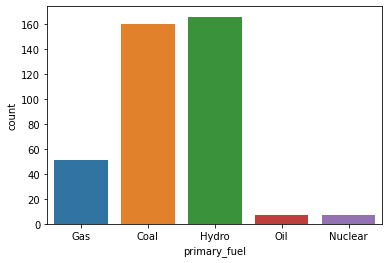

In [33]:
sns.countplot(x='primary_fuel',data=df)
plt.show()

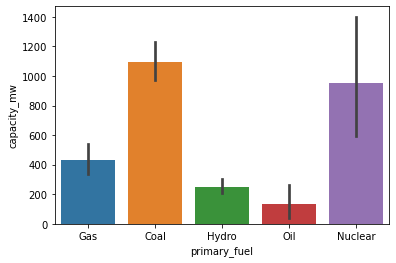

In [34]:
sns.barplot(x="primary_fuel", y="capacity_mw", data=df)
plt.show()

In [ ]:
sns.barplot(x="primary_fuel", y="capacity_mw", data=df)
plt.show()

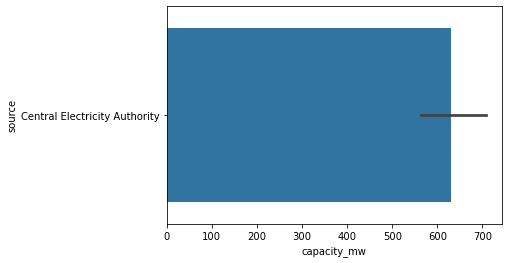

In [36]:
sns.barplot(x="capacity_mw", y="source", data=df)
plt.show()

In [39]:
df = df.drop(['source','generation_data_source'],axis=1)

In [40]:
df.head(10)

,capacity_mw,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
3,135.0,Gas,617.789264,843.7470,886.004428,663.774500,626.239128
4,1800.0,Coal,3035.550000,5916.3700,6243.000000,5385.579736,7279.000000
5,250.0,Coal,1153.421000,1208.8520,1175.765000,1147.913000,976.655000
6,60.0,Hydro,157.558250,152.1952,61.421350,89.629600,48.327150
7,192.0,Hydro,674.391100,721.3352,675.724400,679.594950,579.318850
8,290.0,Hydro,480.594950,144.4342,402.029750,439.372100,406.377900
9,210.0,Coal,1887.904000,1643.0460,1338.093000,1563.457000,1487.880000
10,1350.0,Coal,1920.971000,5629.6630,1701.008000,4350.558000,3717.154000
11,134.0,Hydro,614.412500,665.1973,670.500650,644.570950,425.641100
12,1200.0,Coal,7744.000000,8076.8105,7902.021600,7940.740000,7873.973000


In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
leb=LabelEncoder()

In [43]:
df1 = leb.fit_transform(df['primary_fuel'])

In [45]:
pd.Series(df1)

0      1
1      0
2      0
3      2
4      2
      ..
386    2
387    0
388    0
389    2
390    0
Length: 391, dtype: int32

In [46]:
df['primary_fuel'] = df1

In [47]:
df

,capacity_mw,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
3,135.0,1,617.789264,843.74700,886.004428,663.774500,626.239128
4,1800.0,0,3035.550000,5916.37000,6243.000000,5385.579736,7279.000000
5,250.0,0,1153.421000,1208.85200,1175.765000,1147.913000,976.655000
6,60.0,2,157.558250,152.19520,61.421350,89.629600,48.327150
7,192.0,2,674.391100,721.33520,675.724400,679.594950,579.318850
...,...,...,...,...,...,...,...
882,400.0,2,1806.860300,1204.59675,2031.839750,2150.095500,1922.359900
889,1470.0,0,6753.870000,5161.53800,3539.630000,7018.217000,7582.300000
890,540.0,0,1045.820000,1651.15890,1229.480000,999.170000,940.390000
893,62.4,2,184.453100,183.00000,204.253600,175.866250,236.491600


In [48]:
from sklearn.preprocessing import PowerTransformer

In [70]:
features = ['capacity_mw','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']

In [71]:
scaler = PowerTransformer(method='yeo-johnson')

In [72]:
df[features] = scaler.fit_transform(df[features].values)

In [73]:
df[features]

,capacity_mw,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
3,-0.684790,-0.214541,-0.072922,-0.036262,-0.180297,-0.220084
4,1.406354,0.711966,1.163963,1.192642,1.066174,1.267389
5,-0.221350,0.113186,0.121848,0.114402,0.096475,-0.001725
6,-1.262817,-0.801701,-0.835869,-1.117708,-0.968878,-1.166252
7,-0.422427,-0.171029,-0.153640,-0.172893,-0.169024,-0.256392
...,...,...,...,...,...,...
882,0.146174,0.376272,0.119871,0.430356,0.454210,0.371034
889,1.228989,1.303665,1.061451,0.786917,1.264425,1.298738
890,0.387270,0.058943,0.302155,0.138962,0.023373,-0.021089
893,-1.235710,-0.741937,-0.765225,-0.697955,-0.737363,-0.636418


In [74]:
df['capacity_mw'] = df[features]['capacity_mw']
df['generation_gwh_2014'] = df[features]['generation_gwh_2014']
df['generation_gwh_2015'] = df[features]['generation_gwh_2015']
df['generation_gwh_2016'] = df[features]['generation_gwh_2016']
df['generation_gwh_2017'] = df[features]['generation_gwh_2017']
df['generation_gwh_2018'] = df[features]['generation_gwh_2018']


In [75]:
df.head(10)

,capacity_mw,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
3,-0.684790,1,-0.214541,-0.072922,-0.036262,-0.180297,-0.220084
4,1.406354,0,0.711966,1.163963,1.192642,1.066174,1.267389
5,-0.221350,0,0.113186,0.121848,0.114402,0.096475,-0.001725
6,-1.262817,2,-0.801701,-0.835869,-1.117708,-0.968878,-1.166252
7,-0.422427,2,-0.171029,-0.153640,-0.172893,-0.169024,-0.256392
8,-0.106609,2,-0.334968,-0.855480,-0.415556,-0.369328,-0.414808
9,-0.354593,0,0.403310,0.299221,0.186096,0.266889,0.224014
10,1.155141,0,0.414077,1.126347,0.324008,0.913781,0.785685
11,-0.690255,2,-0.217236,-0.194408,-0.176701,-0.194273,-0.394738
12,1.053707,0,1.414771,1.407930,1.374403,1.360499,1.327946


In [76]:
X = df.drop("primary_fuel",axis=1)
y = df.primary_fuel

In [77]:
scaler = StandardScaler()

In [78]:
X_scaler = scaler.fit_transform(X)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size = 0.25, random_state = 4788)

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score,precision_score,confusion_matrix,recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score,cross_val_predict

In [81]:
def print_score(clf,X_train,X_test,y_train,y_test,train=True):
    if train:
        y_pred = clf.predict(X_train)
        print("\n ===Train result===")
        print(f"Accuracy Score:{accuracy_score(y_train,y_pred)*100:.2f}%")
    elif train==False:
        pred = clf.predict(X_test)
        print("\n ===Test result===")
        print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%")
        print('\n \n Test classification report \n',classification_report(y_test,pred,digits=2))    

In [82]:
svc = SVC()
svc.fit(X_train,y_train)
print_score(svc,X_train,X_test,y_train,y_test,train=True)
print_score(svc,X_train,X_test,y_train,y_test,train=False)


 ===Train result===
Accuracy Score:74.74%

 ===Test result===
Accuracy Score:66.33%

 
 Test classification report 
               precision    recall  f1-score   support

           0       0.72      0.69      0.71        42
           1       0.30      0.30      0.30        10
           2       0.69      0.82      0.75        40
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         4

    accuracy                           0.66        98
   macro avg       0.34      0.36      0.35        98
weighted avg       0.62      0.66      0.64        98



In [83]:
gbdt = GradientBoostingClassifier()
gbdt.fit(X_train,y_train)
print_score(gbdt,X_train,X_test,y_train,y_test,train=True)
print_score(gbdt,X_train,X_test,y_train,y_test,train=False)


 ===Train result===
Accuracy Score:100.00%

 ===Test result===
Accuracy Score:65.31%

 
 Test classification report 
               precision    recall  f1-score   support

           0       0.74      0.74      0.74        42
           1       0.15      0.20      0.17        10
           2       0.74      0.78      0.76        40
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         4

    accuracy                           0.65        98
   macro avg       0.33      0.34      0.33        98
weighted avg       0.63      0.65      0.64        98



In [84]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
print_score(rf,X_train,X_test,y_train,y_test,train=True)
print_score(rf,X_train,X_test,y_train,y_test,train=False)


 ===Train result===
Accuracy Score:100.00%

 ===Test result===
Accuracy Score:67.35%

 
 Test classification report 
               precision    recall  f1-score   support

           0       0.72      0.74      0.73        42
           1       0.27      0.30      0.29        10
           2       0.74      0.80      0.77        40
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         4

    accuracy                           0.67        98
   macro avg       0.35      0.37      0.36        98
weighted avg       0.64      0.67      0.66        98



In [85]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
print_score(lr,X_train,X_test,y_train,y_test,train=True)
print_score(lr,X_train,X_test,y_train,y_test,train=False)


 ===Train result===
Accuracy Score:72.35%

 ===Test result===
Accuracy Score:62.24%

 
 Test classification report 
               precision    recall  f1-score   support

           0       0.72      0.67      0.69        42
           1       0.25      0.20      0.22        10
           2       0.61      0.78      0.68        40
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         4

    accuracy                           0.62        98
   macro avg       0.32      0.33      0.32        98
weighted avg       0.58      0.62      0.60        98



In [86]:
dc = DecisionTreeClassifier()
dc.fit(X_train,y_train)
print_score(dc,X_train,X_test,y_train,y_test,train=True)
print_score(dc,X_train,X_test,y_train,y_test,train=False)


 ===Train result===
Accuracy Score:100.00%

 ===Test result===
Accuracy Score:66.33%

 
 Test classification report 
               precision    recall  f1-score   support

           0       0.74      0.74      0.74        42
           1       0.27      0.40      0.32        10
           2       0.79      0.75      0.77        40
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         4

    accuracy                           0.66        98
   macro avg       0.36      0.38      0.37        98
weighted avg       0.67      0.66      0.66        98



           
           
           Random Forest classifier is better than all having accuracy score of 67.35 %.
           
           
          

In [87]:
clf = RandomForestClassifier()

In [92]:
params = {'n_estimators':[10,15],'criterion':['entropy','gini'],'max_depth':[13,18],'min_samples_split':[11,15],'min_samples_leaf':[3,6]}

In [93]:
grid = GridSearchCV(clf,param_grid=params)
grid.fit(X_train,y_train)
print('best_params=>',grid.best_params_)

best_params=> {'criterion': 'entropy', 'max_depth': 18, 'min_samples_leaf': 6, 'min_samples_split': 11, 'n_estimators': 15}


In [94]:
rf = RandomForestClassifier(criterion='entropy',max_depth=18,min_samples_leaf=6,min_samples_split=11,n_estimators=15)
rf.fit(X_train,y_train)
print_score(rf,X_train,X_test,y_train,y_test,train=True)
print_score(rf,X_train,X_test,y_train,y_test,train=False)


 ===Train result===
Accuracy Score:78.16%

 ===Test result===
Accuracy Score:67.35%

 
 Test classification report 
               precision    recall  f1-score   support

           0       0.71      0.71      0.71        42
           1       0.25      0.30      0.27        10
           2       0.75      0.82      0.79        40
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         4

    accuracy                           0.67        98
   macro avg       0.34      0.37      0.35        98
weighted avg       0.64      0.67      0.65        98



                              
                              
                              Seems like cant acheive more than 67.35 % even after parameter tuning.
                              
                              
                              

In [96]:
df = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [97]:
df = df.drop(['country','country_long','name','gppd_idnr','latitude','longitude','other_fuel1','other_fuel2','other_fuel3','commissioning_year','owner','url','geolocation_source','wepp_id','year_of_capacity_data','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'],axis=1)

In [98]:
df = df.drop(['source','generation_data_source'],axis=1)

In [99]:
df

,capacity_mw,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,Solar,NaN,NaN,NaN,NaN,NaN
1,98.0,Coal,NaN,NaN,NaN,NaN,NaN
2,39.2,Wind,NaN,NaN,NaN,NaN,NaN
3,135.0,Gas,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,Coal,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...
902,1600.0,Coal,NaN,0.994875,233.596650,865.400000,686.500000
903,3.0,Solar,NaN,NaN,NaN,NaN,NaN
904,25.5,Wind,NaN,NaN,NaN,NaN,NaN
905,80.0,Coal,NaN,NaN,NaN,NaN,NaN


In [100]:
df = df.dropna()

In [101]:
df.shape

(391, 7)

In [110]:
feat = ['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']

In [111]:
scaler = PowerTransformer(method='yeo-johnson')

In [113]:
df[feat] = scaler.fit_transform(df[feat].values)

In [114]:
df[feat]

,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
3,-0.214541,-0.072922,-0.036262,-0.180297,-0.220084
4,0.711966,1.163963,1.192642,1.066174,1.267389
5,0.113186,0.121848,0.114402,0.096475,-0.001725
6,-0.801701,-0.835869,-1.117708,-0.968878,-1.166252
7,-0.171029,-0.153640,-0.172893,-0.169024,-0.256392
...,...,...,...,...,...
882,0.376272,0.119871,0.430356,0.454210,0.371034
889,1.303665,1.061451,0.786917,1.264425,1.298738
890,0.058943,0.302155,0.138962,0.023373,-0.021089
893,-0.741937,-0.765225,-0.697955,-0.737363,-0.636418


In [115]:
df['generation_gwh_2014'] = df[feat]['generation_gwh_2014']
df['generation_gwh_2015'] = df[feat]['generation_gwh_2015']
df['generation_gwh_2016'] = df[feat]['generation_gwh_2016']
df['generation_gwh_2017'] = df[feat]['generation_gwh_2017']
df['generation_gwh_2018'] = df[feat]['generation_gwh_2018']


In [116]:
df

,capacity_mw,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
3,135.0,1,-0.214541,-0.072922,-0.036262,-0.180297,-0.220084
4,1800.0,0,0.711966,1.163963,1.192642,1.066174,1.267389
5,250.0,0,0.113186,0.121848,0.114402,0.096475,-0.001725
6,60.0,2,-0.801701,-0.835869,-1.117708,-0.968878,-1.166252
7,192.0,2,-0.171029,-0.153640,-0.172893,-0.169024,-0.256392
...,...,...,...,...,...,...,...
882,400.0,2,0.376272,0.119871,0.430356,0.454210,0.371034
889,1470.0,0,1.303665,1.061451,0.786917,1.264425,1.298738
890,540.0,0,0.058943,0.302155,0.138962,0.023373,-0.021089
893,62.4,2,-0.741937,-0.765225,-0.697955,-0.737363,-0.636418
